# Algorithmic Efficiency

Computer codes are often analyzed in terms of the *efficiency* of the algorithm, namely how much computational resources it uses. Here we will consider the two most common resources, time (how long the program takes to run) and space (how much storage/memory the program uses). These are usually quantified in terms of one or more parameters, showing in particular how the algorithm scales when the problem gets larger.

## Big O notation

The Big O notation is used to show how a function grows as e.g. its input parameter approaches infinity, without details such as constants and lower order terms. It is defined as follows:

$$
f(x) = \mathcal{O}(g(x))\text{ as }x\rightarrow\infty 
$$

if there exists a positive real number $M$ and a real number $x_0$ such that

$$
|f(x)| \le M g(x)\qquad\text{for all }x\ge x_0.
$$

For example:

$$
(n+1)^2 = \mathcal{O}(n^2)
$$

since $(n+1)^2 = n^2 + 2n + 1 \le 2n^2$ for $n\ge2$.



## Common asymptotic time complexities

Some of the most common growth functions are listed below. These appear either when analyzing the time and/or the space complexity of an algorithm.

| Notation                             | Name         |
| ------------------------------------ | ------------ |
| $\mathcal{O}(1)$                     | constant     |
| $\mathcal{O}$$(\log n)$              | logarithmic  |
| $\mathcal{O}(n)$                     | linear       |
| $\mathcal{O}$$(n$$\log n)$           | linearithmic |
| $\mathcal{O}(n^2)$                   | quadratic    |
| $\mathcal{O}(c^{n})$, $c>1$          | exponential  |


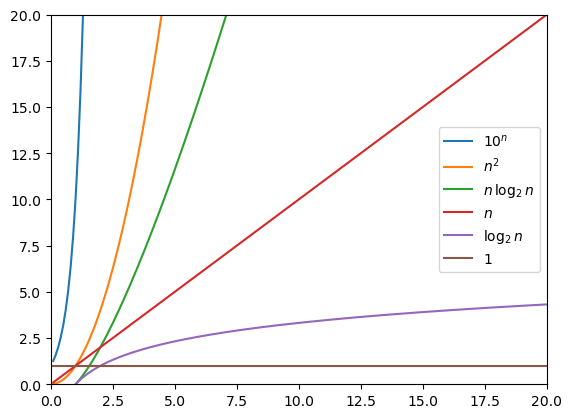

In [6]:
using PyPlot
n = 0.1:0.1:20
plot(n,10.0.^n, n,n.^2, n,n.*log2.(n), n,n, n,log2.(n), n,ones(length(n)))
legend((L"10^n", L"n^2", L"n\,\log_2\,n", L"n", L"\log_2\,n", L"1"), loc="center right");
axis([0,n[end],0,n[end]]);

Note that even though the Big O notation "hides the constant" multiplying the actual function, asymtotically it allows us to only focus on how it grows with $n$.

## Time and Space complexities

We will mostly be concerned about the *time* the program needs to finish, and how much *space* it uses.

**Time**: Instead of measuring exact times in seconds, we usually count the number of operations the program needs to perform. These can e.g. by floating point operations, such as `+`,`-`,`*`,`/` on `Float64` or other standard standard mathematical functions. But it can also be as simple as comparing two entries, any integer operation, etc.

Note that the actual running time (in seconds) will be very different from the operation count, it is even in a different unit and depends on the computer and the details of the operations. However, since the Big O notation is only concerned with the asymtotic growth and ignores e.g. multiplicative constants, we can still use the operation count as a good proxy for the actual time the program will take to run.

**Space**: Data types such as `Float64` need a fixed amount of memory to store, e.g. 64 bits / 8 bytes. However, again we are not concerned about the constant but rather how much the memory usage grows with a parameter. Therefore, we will measure memory usage by considering the size of the arrays that we create (and possibly other array-like types such as strings).

## Examples

### Dot product and matrix products

First, some standard examples on operation and memory counts from linear algebra:

In [21]:
function dot_product(x,y)
    n = length(x)
    d = 0
    for i = 1:n
        d += x[i] * y[i]
    end
    d
end

dot_product (generic function with 1 method)

* Operations: The function will perform one addition and one multiplication per iteration in the for-loop, which will loop `n` times. Therefore, the total operation count is $\mathcal{O}(n)$.
* Memory: The inputs `x`,`y` are vectors of length `n`. The function does not create any other vectors, so the total memory usage is $\mathcal{O}(n)$.


In [27]:
function square_matrix_matrix_product(A,B)
    n = size(A,1)
    C = zeros(n,n)
    for i = 1:n
        for j = 1:n
            for k = 1:n
                C[i,j] += A[i,k] * B[k,j]
            end
        end
    end
    C
end

square_matrix_matrix_product (generic function with 1 method)

* Operations: The nested for-loops will result in a total of $n\times n \times n$ executions, each performing one multiplication and one addition. So the total operation count is $\mathcal{O}(n^3)$.
* Memory: The inputs and the output are all matrices of size $n\times n$, so the total memory usage is $\mathcal{O}(n^2)$.

### Find largest

Now let's look at an example implemented in two different way, with different memory requirements. Consider the problem of computing

$$
\max_i \sin x_i,\ \ \text{where }\ x_i=i/n\text{ for }i=0,\ldots,n.
$$

Our first version calculates all the $\sin x_i$ values and stores them in a vector, then it finds the largest element:

In [37]:
function largest_sin_v1(n)
    # Non-vectorized
    
    # Compute and store all sin x[i]
    sinx = zeros(n+1) 
    for i = 0:n
        sinx[i+1] = sin(i/n)
    end
    
    # Find the largest
    largest = sinx[1]
    for i = 1:n
        if sinx[i+1] > largest
            largest = sinx[i+1]
        end
    end
    return largest
end

largest_sin_v1 (generic function with 1 method)

* Operations: The first for-loop will perform $n+1$ divisions and $n+1$ sin function calls. The second for-loop will perform $n$ comparisons. In total, this gives an operation count of $\mathcal{O}(n)$ for the function. 
* Memory: The inputs and the outputs are scalar (that is, $\mathcal{O}(1)$ memory). However, since we allocate an array of length $n+1$ to store the sin-values, the total memory usage is $\mathcal{O}(n)$.

Note that this is true even if we vectorize by using element-wise operations and array functions. The code below is short, elegant, and easy to read, but it still requires $\mathcal{O}(n)$ memory to store the sin-values:

In [41]:
function largest_sin_v2(n)
    # Vectorized
    x = (0:n) ./ n
    sinx = sin.(x)
    largest = maximum(sinx)
end

largest_sin_v2 (generic function with 1 method)

* Operations: Same as before, $\mathcal{O}(n)$
* Memory: Same as before, $\mathcal{O}(n)$

But it is actually possible to improve on this, by noting that we do not need to store all the $x_i$ or the sin values. Instead, simply keep track of the largest element as we go through the computations:

In [39]:
function largest_sin_v3(n)
    # No arrays, constant amount of memory
    largest = sin(0)
    for i = 1:n
        x = i/n
        sinx = sin(x)
        if sinx > largest
            largest = sinx
        end
    end
    return largest
end 

largest_sin_v3 (generic function with 1 method)

* Operations: Same as before, $\mathcal{O}(n)$
* Memory: Since no arrays are created, the memory usage is now only $\mathcal{O}(1)$.

This shows that the choice of algorithm can greatly influence the time and/or space complexities of a program. In this case, the first two versions would run out of memory for large $n$, while the third version would only be limited by computational time.